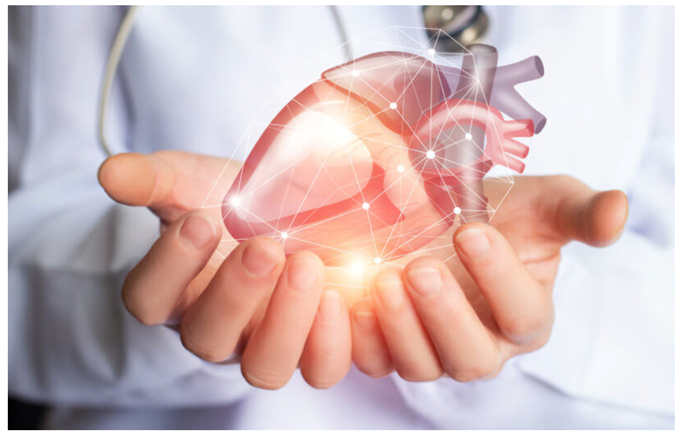

**This juyter file is based on heart disease classification using Logistic Regression, Support Vector Machine(SVM), Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbor(KNN)**

# `Importing modules`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# `Reading the dataset`

_Reading the csv file_

In [2]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<u>**Details of the data:**
* **age** - _age in years_
* **sex** - _(1 = male; 0 = female)_
* **cp** - _chest pain type_
* **trestbps** - _resting blood pressure (in mm Hg on admission to the hospital)_
* **chol** - _serum cholestoral in mg/dl_
* **fbs** - _(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)_
* **restecg** - _resting electrocardiographic results_
* **thalach** - _maximum heart rate achieved_
* **exang** - _exercise induced angina (1 = yes; 0 = no)_
* **oldpeak** - _ST depression induced by exercise relative to rest_
* **slope** - _the slope of the peak exercise ST segment_
* **ca** - _number of major vessels (0-3) colored by flourosopy_
* **thal** - _3 = normal; 6 = fixed defect; 7 = reversable defect_
* **target** - _have disease or not (1=yes, 0=no)_

_No. of rows and columns present_

In [3]:
data.shape

(1025, 14)

_Columns Present in the data_

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

_Summary of the data_

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


_Unique data in each column_

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

_unique value present in the column sex_

In [7]:
data.sex.unique()

array([1, 0])

_unique value present in the column cp_

In [8]:
data.cp.unique()

array([0, 1, 2, 3])

_unique value present in the column fbs_

In [9]:
data.fbs.unique()

array([0, 1])

_unique value present in the column restecg_

In [10]:
data.restecg.unique()

array([1, 0, 2])

_unique value present in the column exang_

In [11]:
data.exang.unique()

array([0, 1])

_unique value present in the column slope_

In [12]:
data.slope.unique()

array([2, 0, 1])

_unique value present in the column ca_

In [13]:
data.ca.unique()

array([2, 0, 1, 3, 4])

_unique value present in the column thal_

In [14]:
data.thal.unique()

array([3, 2, 1, 0])

_unique value present in the column target_

In [15]:
data.target.unique()

array([0, 1])

_Description of the data_

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


_Total no. of null values present in each column_

In [17]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

_Total no. of duplicate values present in the data_

In [18]:
data.duplicated().sum()

723

_Removing all duplicate values present in the data_

In [19]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
data=data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# `Data Visualization`

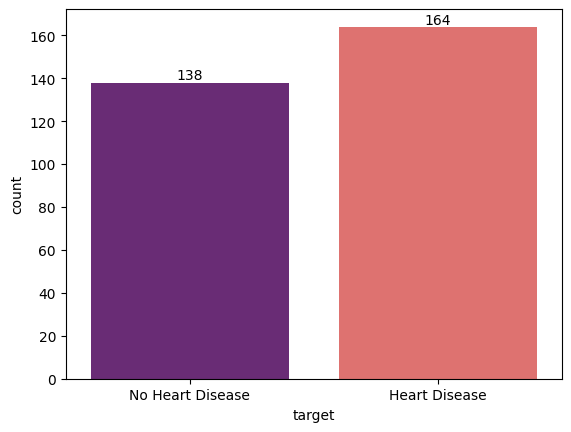

In [21]:
ax=sns.countplot(data=data,x='target',palette='magma')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.show()

> _Above plot shows the count of patients having Heart Disease or not. Patients with no heart disease are 138 in total and patients sufferring from heart disease are 164 in total._

In [22]:
sex=pd.crosstab(data.sex,data.target)
sex

target,0,1
sex,,
0,24,72
1,114,92


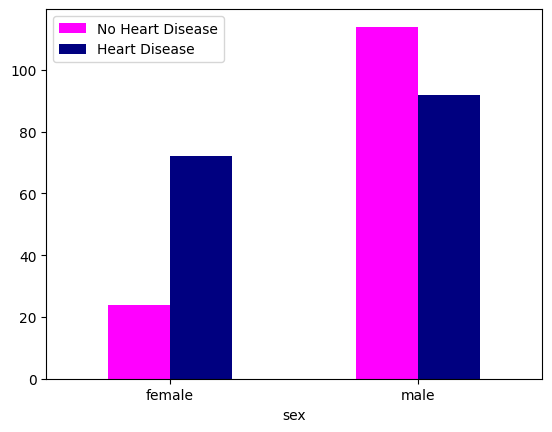

In [23]:
sex.plot(kind="bar",color=['magenta','navy'])
plt.xticks([0,1],['female','male'],rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of each sex whether they are suffering from the diseaase or not. Female patients with no heart disease are 24 and suffering from heart disease are 72. Male patients with no heart disease are 114 and suffering from heart disease are 92._

In [24]:
Age=pd.crosstab(data.age,data.target)
Age

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


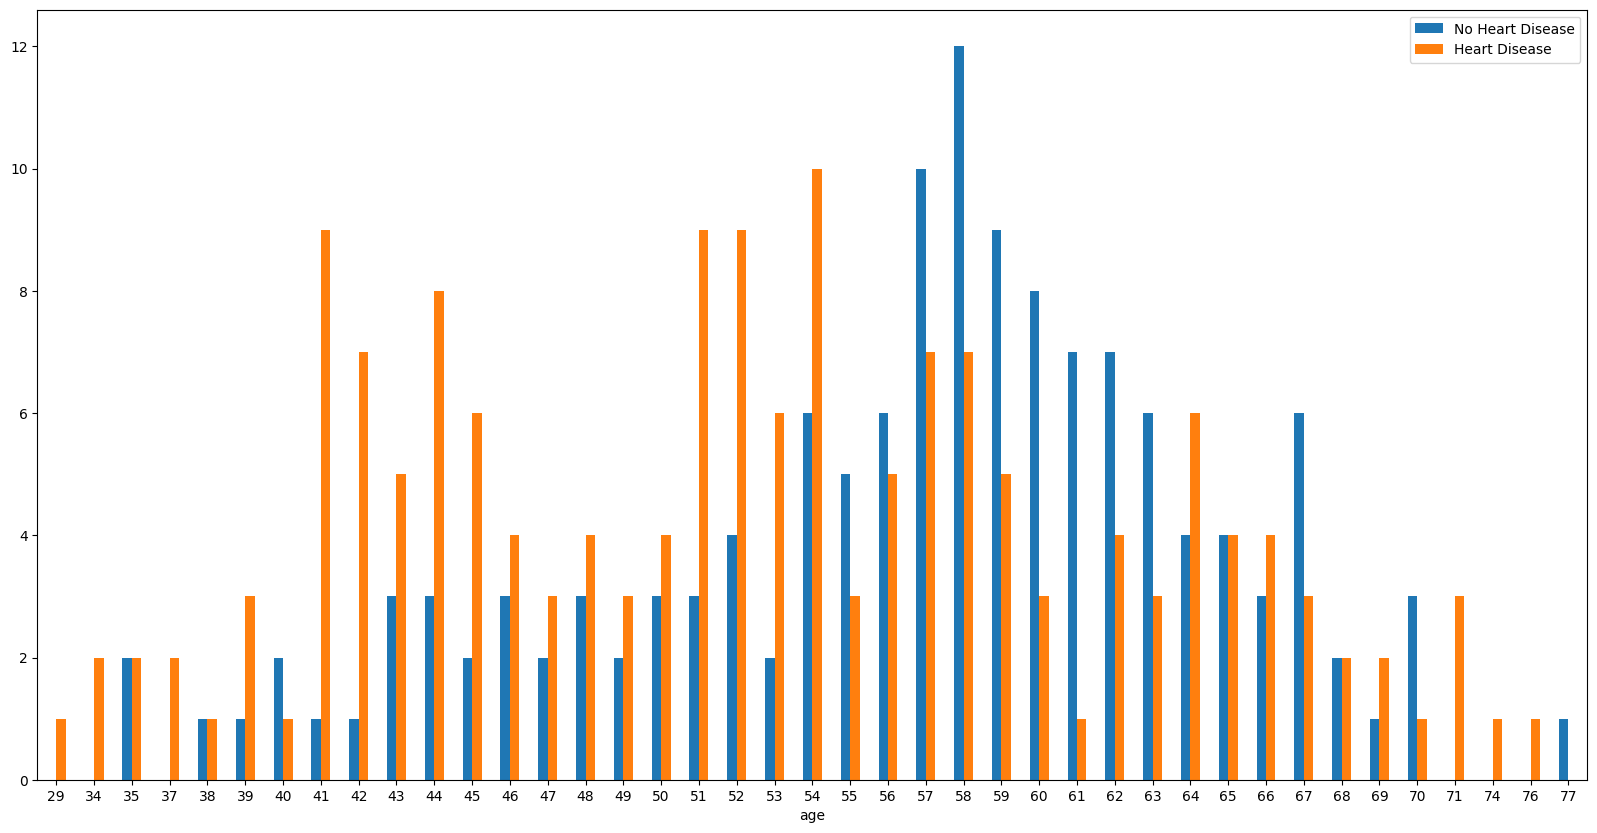

In [25]:
Age.plot(kind="bar",figsize=(20,10))
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of patients having heart disease or not according to age._

In [26]:
FBS=pd.crosstab(data.fbs,data.target)
FBS

target,0,1
fbs,,
0,116,141
1,22,23


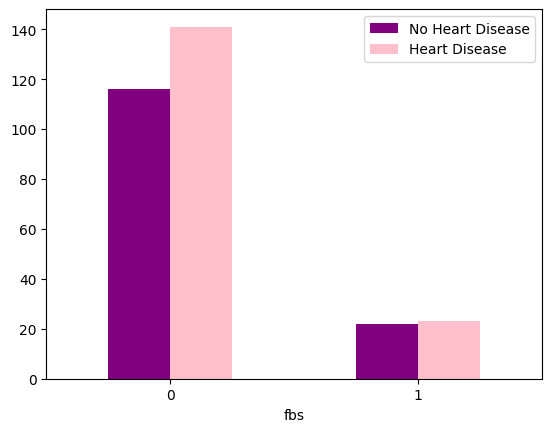

In [27]:
FBS.plot(kind="bar",color=['purple','pink'])
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of patients having heart disease or not according to fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)._

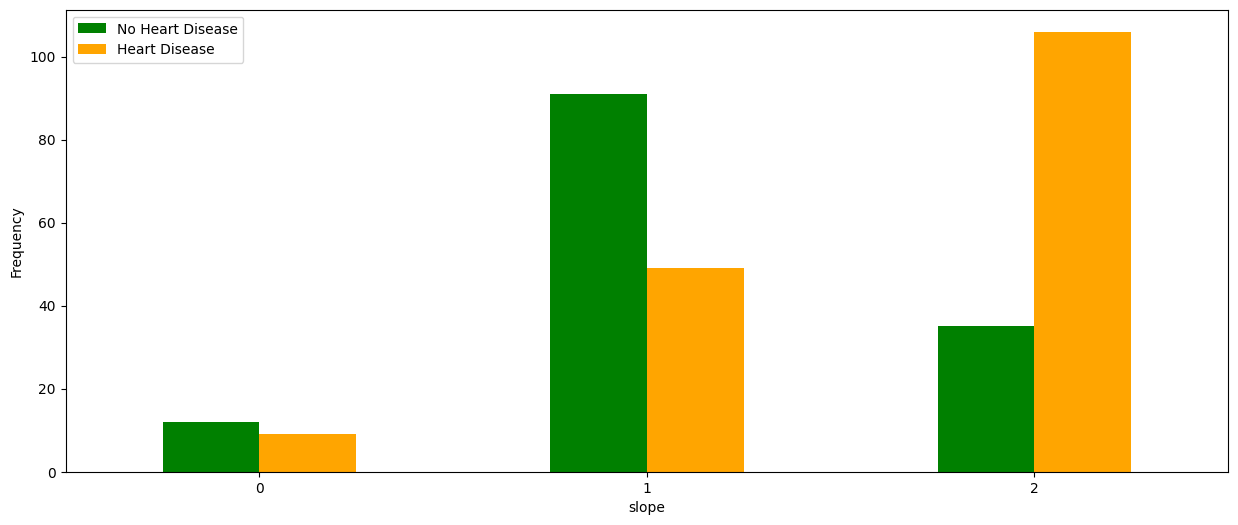

In [28]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['green','orange' ])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frquency of patients having heart disease or not according to slope of the peak exercise ST segment_

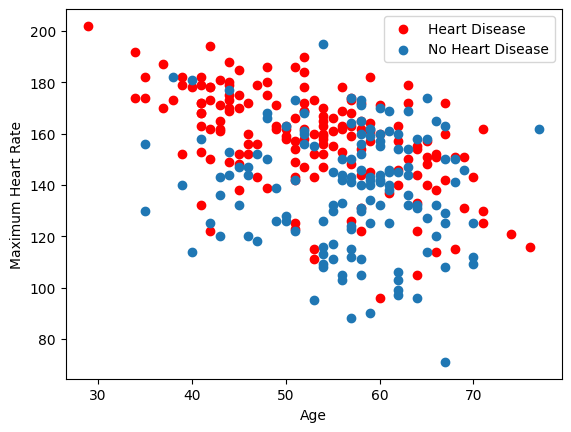

In [29]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

> _Above plot shows the maximum heart rate of individual age based on whether they are suffering from heart disease or not._

# `Data Preprocessing`

* ### Creating Dummy Variables

_Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables._

In [30]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [31]:
data = pd.concat([data, a, b, c], axis = 1)

In [32]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,0,...,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,1,175,0,0.6,0,...,0,1,0,0,0,1,0,0,1,0
739,52,1,128,255,0,1,161,1,0.0,1,...,0,0,0,0,0,0,1,0,0,1
843,59,1,160,273,0,0,125,0,0.0,0,...,0,0,1,0,0,1,0,0,0,1


# `Train Test Split`

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=data.drop('target',axis=1)
y=data.target

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=20)

In [36]:
X_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
113,57,1,110,335,0,1,143,1,3.0,1,...,0,0,0,0,0,0,1,0,1,0
80,50,1,140,233,0,1,163,0,0.6,1,...,0,1,0,0,0,0,1,0,1,0
151,54,1,192,283,0,0,195,0,0.0,1,...,1,0,0,0,0,0,1,0,0,1
65,59,1,170,288,0,0,159,0,0.2,0,...,0,0,1,0,0,0,1,0,1,0
128,52,1,138,223,0,1,169,0,0.0,4,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,63,1,140,187,0,0,144,1,4.0,2,...,0,0,0,0,0,0,1,0,0,1
566,50,0,110,254,0,0,159,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
328,70,1,130,322,0,0,109,0,2.4,3,...,0,0,0,0,0,1,0,0,1,0
337,54,1,125,273,0,0,152,0,0.5,1,...,0,1,0,0,0,1,0,1,0,0


In [37]:
y_train

113    0
80     0
151    0
65     0
128    1
      ..
77     0
566    1
328    0
337    1
528    1
Name: target, Length: 211, dtype: int64

# `Accuracy score and f1 score`

In [38]:
from sklearn.metrics  import f1_score,accuracy_score, confusion_matrix

In [39]:
acc=pd.DataFrame({'Model':[],'Accuracy_score':[]})
acc

,Model,Accuracy_score


In [40]:
f1=pd.DataFrame({'Model':[],'f1_score':[]})
f1

,Model,f1_score


# `Model`

## 1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [43]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1])

In [45]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [46]:
print(accuracy_score(y_test,y_pred))

0.8571428571428571


In [47]:
print(f1_score(y_test,y_pred))

0.8785046728971964


In [48]:
acc.loc[1]=['Logistic Regression',accuracy_score(y_test,y_pred)]
f1.loc[1]=['Logistic Regression',f1_score(y_test,y_pred)]

In [49]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

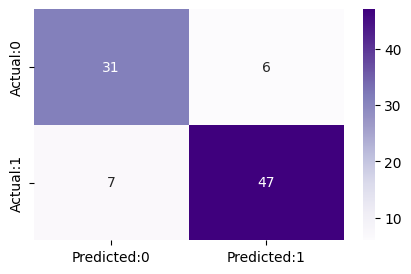

In [50]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

## 2. Support Vector Machine

In [51]:
from sklearn.svm import SVC

In [52]:
model=SVC()

In [53]:
model.fit(X_train,y_train)

SVC()

In [54]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [55]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [56]:
print(accuracy_score(y_test,y_pred))

0.7362637362637363


In [57]:
print(f1_score(y_test,y_pred))

0.7894736842105262


In [58]:
acc.loc[2]=['SVM',accuracy_score(y_test,y_pred)]
f1.loc[2]=['SVM',f1_score(y_test,y_pred)]

In [59]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

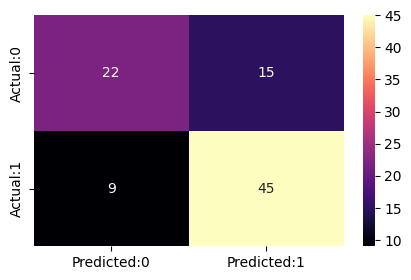

In [60]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "magma")
plt.show()

## 3. Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gauss=GaussianNB()

In [63]:
gauss.fit(X_train,y_train)

GaussianNB()

In [64]:
y_pred_gauss=gauss.predict(X_test)
y_pred_gauss

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1])

In [65]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [66]:
print(accuracy_score(y_test,y_pred_gauss))

0.8351648351648352


In [67]:
print(f1_score(y_test,y_pred_gauss))

0.8571428571428571


In [68]:
acc.loc[3]=['Gaussian NB',accuracy_score(y_test,y_pred_gauss)]
f1.loc[3]=['Gaussian NB',f1_score(y_test,y_pred_gauss)]

In [69]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred_gauss),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

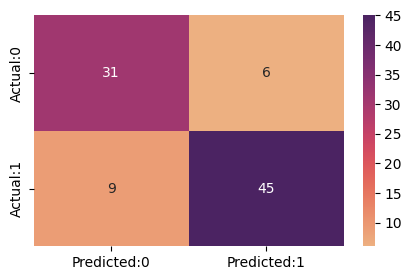

In [70]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "flare")
plt.show()

## 4. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model=DecisionTreeClassifier(random_state=100)

In [73]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

[Text(0.5747282608695652, 0.9545454545454546, 'x[16] <= 0.5\ngini = 0.499\nsamples = 211\nvalue = [101, 110]'),
 Text(0.3451086956521739, 0.8636363636363636, 'x[10] <= 0.5\ngini = 0.364\nsamples = 96\nvalue = [73, 23]'),
 Text(0.19021739130434784, 0.7727272727272727, 'x[19] <= 0.5\ngini = 0.5\nsamples = 33\nvalue = [17, 16]'),
 Text(0.08695652173913043, 0.6818181818181818, 'x[11] <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.043478260869565216, 0.5909090909090909, 'x[9] <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.021739130434782608, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.06521739130434782, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13043478260869565, 0.5909090909090909, 'x[3] <= 241.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.10869565217391304, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15217391304347827, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.29347826086956524, 0.6818181818181

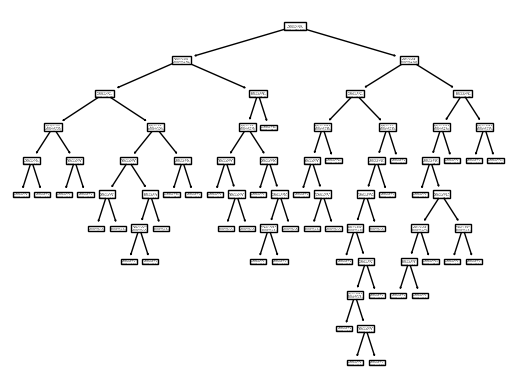

In [74]:
from sklearn import tree
tree.plot_tree(model)

In [75]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1])

In [76]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [77]:
print(accuracy_score(y_test,y_pred))

0.7252747252747253


In [78]:
print(f1_score(y_test,y_pred))

0.7524752475247524


In [79]:
acc.loc[4]=['Decision Tree',accuracy_score(y_test,y_pred)]
f1.loc[4]=['Decision Tree',f1_score(y_test,y_pred)]

In [80]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

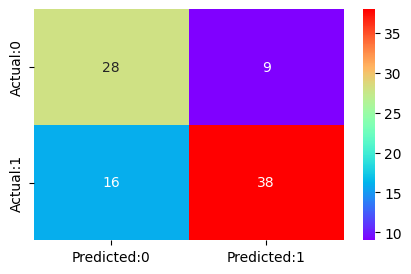

In [81]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "rainbow")
plt.show()

## 5. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model=RandomForestClassifier(n_estimators=200,random_state=100)

In [84]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [85]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1])

In [86]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [87]:
print(accuracy_score(y_test,y_pred))

0.8131868131868132


In [88]:
print(f1_score(y_test,y_pred))

0.838095238095238


In [89]:
acc.loc[5]=['Random Forest',accuracy_score(y_test,y_pred)]
f1.loc[5]=['Random Forest',f1_score(y_test,y_pred)]

In [90]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

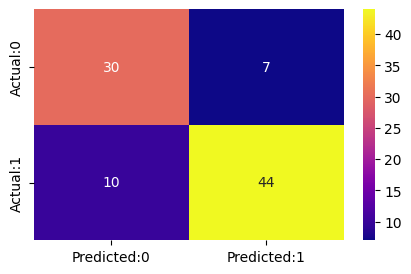

In [91]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "plasma")
plt.show()

## 6. KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
model=KNeighborsClassifier(n_neighbors=5)

In [94]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [96]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [97]:
print(accuracy_score(y_test,y_pred))

0.6153846153846154


In [98]:
print(f1_score(y_test,y_pred))

0.631578947368421


In [99]:
acc.loc[6]=['KNN',accuracy_score(y_test,y_pred)]
f1.loc[6]=['KNN',f1_score(y_test,y_pred)]

In [100]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

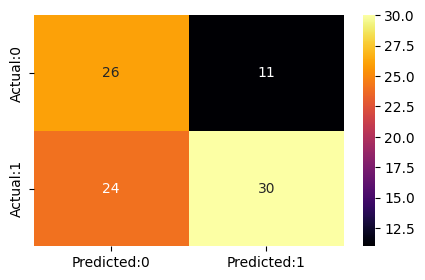

In [101]:
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "inferno")
plt.show()

# `Conclusion`

In [102]:
acc

,Model,Accuracy_score
1,Logistic Regression,0.857143
2,SVM,0.736264
3,Gaussian NB,0.835165
4,Decision Tree,0.725275
5,Random Forest,0.813187
6,KNN,0.615385


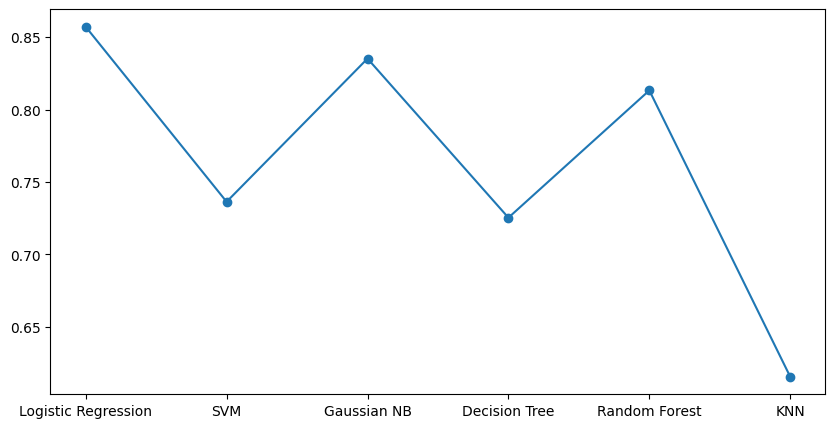

In [103]:
figure=plt.figure(figsize =(10,5))
plt.plot(acc.Model,acc.Accuracy_score,marker='o')

> _**As shown in the above plot, the highest accuracy is of KNN among all the models with 0.87.**_

In [104]:
f1

,Model,f1_score
1,Logistic Regression,0.878505
2,SVM,0.789474
3,Gaussian NB,0.857143
4,Decision Tree,0.752475
5,Random Forest,0.838095
6,KNN,0.631579


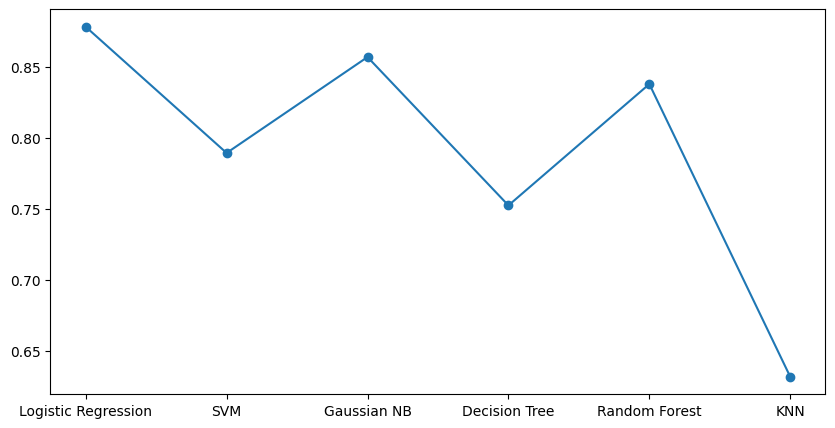

In [105]:
figure=plt.figure(figsize =(10,5))
plt.plot(f1.Model,f1.f1_score,marker='o')

> _**As shown in the above plot, the highest f1 score is of KNN among all the models with 0.89.**_